# 10 Minutes to pandas


Customarily, we import as follows:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [17]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [18]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [19]:
dates = pd.date_range("20130101", periods=6)

In [20]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df = pd.DataFrame(
    np.random.randn(6, 4), 
    index=dates, 
    columns=["A", "B", "C", "D"]
)

In [22]:
df

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


In [23]:
{"a": 1, "b": 3}

{'a': 1, 'b': 3}

Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [24]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [25]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [26]:
"jason".upper()

'JASON'

Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [27]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

## Viewing Data

See the top & bottom rows of the frame

In [28]:
df.head(2)

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704


In [29]:
df.tail(2)

,A,B,C,D
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


Describe shows a quick statistic summary of your data

In [30]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.437207,-0.323551,-0.131095,-0.493578
std,1.416488,0.930663,0.911292,1.265150
min,-2.103128,-1.959551,-1.502092,-2.706815
25%,0.224959,-0.533414,-0.602895,-0.825173
50%,0.543866,-0.224137,-0.038736,-0.290761
75%,1.332433,0.303956,0.349252,0.211502
max,1.924689,0.623035,1.105362,0.951253


Transposing your data

In [31]:
df.T.T

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


In [32]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [33]:
df.columns = ["A", "B", "C", "D"]
df

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


Sorting by an axis

In [34]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317


Sorting by value

In [35]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815


In [36]:
df

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


In [37]:
ddf = df.copy()

In [38]:
ddf.sort_values(by="B", inplace=True)

In [39]:
ddf

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815


In [40]:
df

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


## Selection

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [41]:
df["A"]

2013-01-01   -2.103128
2013-01-02    1.924689
2013-01-03    0.170205
2013-01-04    1.543741
2013-01-05    0.698511
2013-01-06    0.389222
Freq: D, Name: A, dtype: float64

In [42]:
df.C

2013-01-01   -0.239051
2013-01-02    0.161579
2013-01-03    1.105362
2013-01-04    0.411810
2013-01-05   -1.502092
2013-01-06   -0.724177
Freq: D, Name: C, dtype: float64

Selecting via [], which slices the rows.

In [43]:
df[0:3]

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253


### Selection by Label


For getting a cross section using a label

In [44]:
dates[0]

Timestamp('2013-01-01 00:00:00')

In [45]:
df.loc[dates[0]]

A   -2.103128
B   -1.959551
C   -0.239051
D    0.331317
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [46]:
df.loc["2013-01-02":"2013-01-04"]

,A,B,C,D
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945


Showing label slicing, both endpoints are included

In [47]:
df.loc["20130102":"20130104", "A":"C"]

,A,B,C
2013-01-02,1.924689,-0.231323,0.161579
2013-01-03,0.170205,-0.216950,1.105362
2013-01-04,1.543741,0.477592,0.411810


Reduction in the dimensions of the returned object

In [48]:
df.loc["20130102", ["A", "B"]]

A    1.924689
B   -0.231323
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [49]:
df.loc[dates[0], "A"]

-2.1031279612940708

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [50]:
df.iloc[0]

A   -2.103128
B   -1.959551
C   -0.239051
D    0.331317
Name: 2013-01-01 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [51]:
df.iloc[3:5, -2:]

,C,D
2013-01-04,0.411810,-0.147945
2013-01-05,-1.502092,-2.706815


By lists of integer position locations, similar to the numpy/python style

In [52]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.924689,0.161579
2013-01-03,0.170205,1.105362
2013-01-05,0.698511,-1.502092


For slicing rows explicitly

In [53]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253


For slicing columns explicitly

In [54]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.959551,-0.239051
2013-01-02,-0.231323,0.161579
2013-01-03,-0.216950,1.105362
2013-01-04,0.477592,0.411810
2013-01-05,0.623035,-1.502092
2013-01-06,-0.634111,-0.724177


For getting a value explicitly

In [55]:
df.iloc[1, 1]

-0.23132296889269469

For getting fast access to a scalar (equiv to the prior method)

In [56]:
df.iat[1, 1]

-0.23132296889269469

## Boolean Indexing

Using a single column’s values to select data.

In [57]:
df.A > 0

2013-01-01    False
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05     True
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [58]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


In [59]:
df[df.A > 0].iloc[:, 0].dropna()

2013-01-02    1.924689
2013-01-03    0.170205
2013-01-04    1.543741
2013-01-05    0.698511
2013-01-06    0.389222
Freq: D, Name: A, dtype: float64

In [60]:
a = df[df.A > 0]
b = a.iloc[:, 0]
c = b.dropna()

In [61]:
(
    df[df.A > 0]
    .iloc[:, 0]
    .dropna()
)

2013-01-02    1.924689
2013-01-03    0.170205
2013-01-04    1.543741
2013-01-05    0.698511
2013-01-06    0.389222
Freq: D, Name: A, dtype: float64

Using the isin() method for filtering:

In [62]:
df2 = df.copy()

In [63]:
df2

,A,B,C,D
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317
2013-01-02,1.924689,-0.231323,0.161579,-0.955704
2013-01-03,0.170205,-0.216950,1.105362,0.951253
2013-01-04,1.543741,0.477592,0.411810,-0.147945
2013-01-05,0.698511,0.623035,-1.502092,-2.706815
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577


In [64]:
df2["F"] = ["one", "one", "two", "three", "four", "three"]

In [65]:
df2

,A,B,C,D,F
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317,one
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,one
2013-01-03,0.170205,-0.216950,1.105362,0.951253,two
2013-01-04,1.543741,0.477592,0.411810,-0.147945,three
2013-01-05,0.698511,0.623035,-1.502092,-2.706815,four
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577,three


In [68]:
mask = df2["F"].isin(["two", "four"])

In [69]:
df2[mask]

,A,B,C,D,F
2013-01-03,0.170205,-0.216950,1.105362,0.951253,two
2013-01-05,0.698511,0.623035,-1.502092,-2.706815,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [71]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [72]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [73]:
df["F"] = s1

In [74]:
df

,A,B,C,D,F
2013-01-01,-2.103128,-1.959551,-0.239051,0.331317,NaN
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0
2013-01-05,0.698511,0.623035,-1.502092,-2.706815,4.0
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577,5.0


Setting values by label

In [75]:
df.at[dates[0], "A"] = 1.0

Settomg values by position

In [76]:
df.iat[-1, -1] = 10

The result of the prior setting operations

In [77]:
df

,A,B,C,D,F
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,NaN
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0
2013-01-05,0.698511,0.623035,-1.502092,-2.706815,4.0
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577,10.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [78]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [79]:
df1

,A,B,C,D,F,E
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,NaN,NaN
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0,NaN
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0,NaN
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0,NaN


In [80]:
df1.iloc[0:1]

,A,B,C,D,F,E
2013-01-01,1.0,-1.959551,-0.239051,0.331317,NaN,NaN


In [81]:
df1.loc[[dates[0], dates[1], dates[3]], "E"] = 1

In [82]:
df1

,A,B,C,D,F,E
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,NaN,1.0
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0,NaN
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0,1.0


In [83]:
df1.bfill()

,A,B,C,D,F,E
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,1.0,1.0
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0,1.0
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0,1.0


To drop any rows that have missing data.

In [84]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0,1.0
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0,1.0


In [85]:
df1

,A,B,C,D,F,E
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,NaN,1.0
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0,NaN
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0,1.0


Filling missing data

In [86]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,5.0,1.0
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0,5.0
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0,1.0


To get the boolean mask where values are nan

In [87]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,False


## Operations

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [88]:
df.mean(axis=0)

A    0.954395
B   -0.323551
C   -0.131095
D   -0.493578
F    4.000000
dtype: float64

Same operation on the other axis

In [89]:
df.mean(axis=1)

2013-01-01   -0.216821
2013-01-02    0.379848
2013-01-03    0.801974
2013-01-04    1.057039
2013-01-05    0.222528
2013-01-06    1.719472
Freq: D, dtype: float64

### Apply

Applying functions to the data

In [90]:
df

,A,B,C,D,F
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,NaN
2013-01-02,1.924689,-0.231323,0.161579,-0.955704,1.0
2013-01-03,0.170205,-0.216950,1.105362,0.951253,2.0
2013-01-04,1.543741,0.477592,0.411810,-0.147945,3.0
2013-01-05,0.698511,0.623035,-1.502092,-2.706815,4.0
2013-01-06,0.389222,-0.634111,-0.724177,-0.433577,10.0


In [91]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,1.000000,-1.959551,-0.239051,0.331317,NaN
2013-01-02,2.924689,-2.190874,-0.077472,-0.624387,1.0
2013-01-03,3.094894,-2.407824,1.027890,0.326866,3.0
2013-01-04,4.638635,-1.930232,1.439700,0.178921,6.0
2013-01-05,5.337146,-1.307197,-0.062392,-2.527894,10.0
2013-01-06,5.726368,-1.941308,-0.786569,-2.961471,20.0


In [92]:
def mult(x):
    return x * x

In [93]:
df.apply(mult)

,A,B,C,D,F
2013-01-01,1.000000,3.839840,0.057145,0.109771,NaN
2013-01-02,3.704430,0.053510,0.026108,0.913371,1.0
2013-01-03,0.028970,0.047067,1.221826,0.904882,4.0
2013-01-04,2.383137,0.228094,0.169587,0.021888,9.0
2013-01-05,0.487917,0.388173,2.256280,7.326846,16.0
2013-01-06,0.151494,0.402096,0.524432,0.187989,100.0


### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [94]:
df = pd.DataFrame(np.random.randn(10, 4))

In [95]:
df

,0,1,2,3
0,1.440806,0.008836,-0.033605,0.914131
1,2.244586,1.044344,-0.187475,-1.053711
2,-1.870165,0.425923,-1.358127,0.058034
3,0.324689,-0.273655,1.434383,1.158211
4,-0.108613,-0.557955,-0.236244,-0.615859
5,-0.510922,1.405530,0.201922,1.730483
6,0.997345,0.264652,-0.512418,-0.483492
7,0.165694,0.712922,-0.069173,-0.040225
8,-0.529624,-0.495228,-2.004172,-0.076963
9,-0.560058,0.149178,-0.825691,1.187094


In [96]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [97]:
pieces

[          0         1         2         3
 0  1.440806  0.008836 -0.033605  0.914131
 1  2.244586  1.044344 -0.187475 -1.053711
 2 -1.870165  0.425923 -1.358127  0.058034,
           0         1         2         3
 3  0.324689 -0.273655  1.434383  1.158211
 4 -0.108613 -0.557955 -0.236244 -0.615859
 5 -0.510922  1.405530  0.201922  1.730483
 6  0.997345  0.264652 -0.512418 -0.483492,
           0         1         2         3
 7  0.165694  0.712922 -0.069173 -0.040225
 8 -0.529624 -0.495228 -2.004172 -0.076963
 9 -0.560058  0.149178 -0.825691  1.187094]

In [98]:
pd.concat(pieces)

,0,1,2,3
0,1.440806,0.008836,-0.033605,0.914131
1,2.244586,1.044344,-0.187475,-1.053711
2,-1.870165,0.425923,-1.358127,0.058034
3,0.324689,-0.273655,1.434383,1.158211
4,-0.108613,-0.557955,-0.236244,-0.615859
5,-0.510922,1.405530,0.201922,1.730483
6,0.997345,0.264652,-0.512418,-0.483492
7,0.165694,0.712922,-0.069173,-0.040225
8,-0.529624,-0.495228,-2.004172,-0.076963
9,-0.560058,0.149178,-0.825691,1.187094


### Join

In [99]:
left = df = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3", "K4", "K5"],
        "A": ["A0", "A1", "A2", "A3", "A4", "A5"],
    }
)

In [100]:
right = pd.DataFrame({"key": ["K0", "K1", "K2"], "B": ["B0", "B1", "B2"]})

In [101]:
right

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [102]:
left.join(right, lsuffix="_caller", rsuffix="_other")

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [103]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [104]:
df

,A,B,C,D
0,foo,one,-0.090959,-0.455245
1,bar,one,-1.226116,0.480040
2,foo,two,-0.224402,1.015100
3,bar,three,0.234208,1.218546
4,foo,two,-1.491577,1.972508
5,bar,two,-0.271973,0.476642
6,foo,one,-0.308602,-0.515235
7,foo,three,-0.691514,0.106684


Grouping and then applying a function sum to the resulting groups.

In [105]:
df.groupby("A")[["C", "D"]].mean()

,C,D
A,,
bar,-0.421294,0.725076
foo,-0.561411,0.424763


In [106]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.226116  0.480040
    three  0.234208  1.218546
    two   -0.271973  0.476642
foo one   -0.399561 -0.970479
    three -0.691514  0.106684
    two   -1.715979  2.987608

In [107]:
df = pd.DataFrame(np.random.randn(6,4), dates)

In [108]:
index = pd.date_range('1/1/2000', periods=100, freq='D')

In [109]:
s = pd.Series(range(100), index=index)

In [110]:
s.asfreq('M').to_period("Y")

2000    30
2000    59
2000    90
Freq: A-DEC, dtype: int64

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [111]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [112]:
df

,A,B,C,D,E
0,one,A,foo,0.870212,-0.925078
1,one,B,foo,0.786383,0.809436
2,two,C,foo,-0.288736,0.319285
3,three,A,bar,0.505565,0.340749
4,one,B,bar,0.193159,-0.470073
5,one,C,bar,-0.839928,2.183606
6,two,A,foo,-0.601803,1.152720
7,three,B,foo,-0.032784,0.737235
8,one,C,foo,0.608938,0.847627
9,one,A,bar,-0.472847,-1.359182


We can produce pivot tables from this data very easily:

In [113]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.472847  0.870212
      B  0.193159  0.786383
      C -0.839928  0.608938
three A  0.505565       NaN
      B       NaN -0.032784
      C  0.566327       NaN
two   A       NaN -0.601803
      B  1.348351       NaN
      C       NaN -0.288736

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [114]:
rng = pd.date_range("1/1/2012", periods=1000, freq="S")

In [115]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [116]:
ts

2012-01-01 00:00:00    137
2012-01-01 00:00:01    136
2012-01-01 00:00:02    128
2012-01-01 00:00:03    159
2012-01-01 00:00:04    125
                      ... 
2012-01-01 00:16:35    198
2012-01-01 00:16:36    452
2012-01-01 00:16:37    228
2012-01-01 00:16:38    489
2012-01-01 00:16:39    393
Freq: S, Length: 1000, dtype: int32

In [117]:
ts.resample('5Min').ohlc()

,open,high,low,close
2012-01-01 00:00:00,137,498,3,13
2012-01-01 00:05:00,410,492,0,12
2012-01-01 00:10:00,498,498,1,237
2012-01-01 00:15:00,85,489,2,393


Time zone representation

In [118]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [119]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [120]:
ts

2012-03-06    0.415772
2012-03-07    1.140578
2012-03-08   -1.231074
2012-03-09   -0.174105
2012-03-10   -0.118167
Freq: D, dtype: float64

In [121]:
ts_utc = ts.tz_localize('UTC')

In [122]:
ts_utc

2012-03-06 00:00:00+00:00    0.415772
2012-03-07 00:00:00+00:00    1.140578
2012-03-08 00:00:00+00:00   -1.231074
2012-03-09 00:00:00+00:00   -0.174105
2012-03-10 00:00:00+00:00   -0.118167
Freq: D, dtype: float64


Convert to another time zone

In [123]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.415772
2012-03-06 19:00:00-05:00    1.140578
2012-03-07 19:00:00-05:00   -1.231074
2012-03-08 19:00:00-05:00   -0.174105
2012-03-09 19:00:00-05:00   -0.118167
Freq: D, dtype: float64


Converting between time span representations

In [124]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [125]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [126]:
ts

2012-01-31   -0.520443
2012-02-29    0.596142
2012-03-31   -1.233057
2012-04-30    0.506072
2012-05-31   -0.154570
Freq: M, dtype: float64

In [127]:
ps = ts.to_period()

In [128]:
ps

2012-01   -0.520443
2012-02    0.596142
2012-03   -1.233057
2012-04    0.506072
2012-05   -0.154570
Freq: M, dtype: float64

In [129]:
ps.to_timestamp()

2012-01-01   -0.520443
2012-02-01    0.596142
2012-03-01   -1.233057
2012-04-01    0.506072
2012-05-01   -0.154570
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [130]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [131]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [132]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [133]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [134]:
ts

2000-01-01   -1.020946
2000-01-02   -0.598165
2000-01-03    0.449433
2000-01-04   -0.168793
2000-01-05   -0.988097
                ...   
2002-09-22   -0.704026
2002-09-23   -0.568216
2002-09-24    1.942614
2002-09-25    0.860023
2002-09-26    1.838176
Freq: D, Length: 1000, dtype: float64

In [135]:
ts = ts.cumsum()

In [136]:
ts

2000-01-01    -1.020946
2000-01-02    -1.619111
2000-01-03    -1.169678
2000-01-04    -1.338472
2000-01-05    -2.326569
                ...    
2002-09-22    22.904273
2002-09-23    22.336056
2002-09-24    24.278671
2002-09-25    25.138694
2002-09-26    26.976870
Freq: D, Length: 1000, dtype: float64

<Axes: >

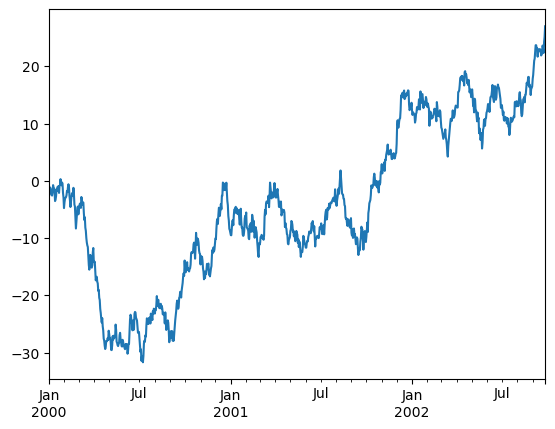

In [137]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [138]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [139]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

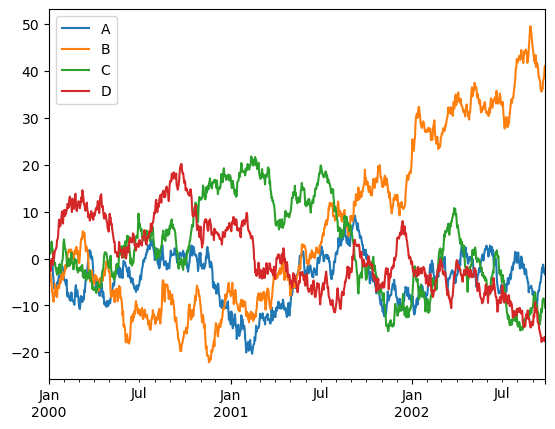

In [140]:
plt.figure(); df.plot(); plt.legend(loc='best')

In [141]:
s = pd.Series(np.random.randn(1000))

<Axes: >

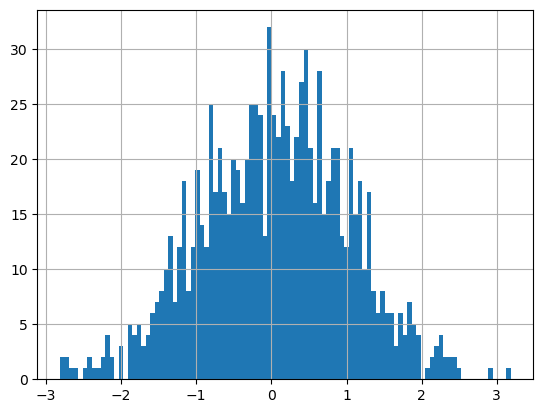

In [142]:
s.hist(bins=100)

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [143]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [144]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.689758,-0.619905,0.863787,-0.184203
1,2000-01-02,-0.705489,-1.445390,0.924548,-0.980976
2,2000-01-03,-1.503231,-2.987870,1.006590,-1.141632
3,2000-01-04,-0.924107,-3.345339,1.615917,-2.653542
4,2000-01-05,-0.628567,-4.874027,1.977527,-1.093300
...,...,...,...,...,...
995,2002-09-22,-1.288014,38.005163,-8.771491,-17.418470
996,2002-09-23,-1.863844,38.257958,-8.465453,-17.052056
997,2002-09-24,-2.779185,38.845005,-8.760222,-16.786350
998,2002-09-25,-3.216514,40.832990,-8.958270,-17.601362


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [145]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [146]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.689758,-0.619905,0.863787,-0.184203
2000-01-02,-0.705489,-1.445390,0.924548,-0.980976
2000-01-03,-1.503231,-2.987870,1.006590,-1.141632
2000-01-04,-0.924107,-3.345339,1.615917,-2.653542
2000-01-05,-0.628567,-4.874027,1.977527,-1.093300
...,...,...,...,...
2002-09-22,-1.288014,38.005163,-8.771491,-17.418470
2002-09-23,-1.863844,38.257958,-8.465453,-17.052056
2002-09-24,-2.779185,38.845005,-8.760222,-16.786350
2002-09-25,-3.216514,40.832990,-8.958270,-17.601362


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [147]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [148]:
pd.read_excel('datapath/assets/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

FileNotFoundError: [Errno 2] No such file or directory: 'datapath/assets/foo.xlsx'

# 🍻